In [1]:
import numpy as np
import scipy as sp
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
import matplotlib.colors as mco
from tqdm.notebook import tqdm

In [2]:
mat = np.load("../matrices/segmentation/downsampled-probabilities.npy")

In [18]:
mat.shape

(542, 542, 894, 5)

In [3]:
highDensity = mat[:,:,:,0]
midDensity = mat[:,:,:,1]
lowDensity = mat[:,:,:,2]
edgeDensity = mat[:,:,:,3]
bgDensity = mat[:,:,:,4]

In [4]:
highDensity_avg = gaussian_filter(highDensity, sigma=5)

In [5]:
midDensity_avg = gaussian_filter(midDensity, sigma=5)

In [6]:
lowDensity_avg = gaussian_filter(lowDensity, sigma=5)

In [7]:
edgeDensity_avg = gaussian_filter(edgeDensity, sigma=5)

In [8]:
bgDensity_avg = gaussian_filter(bgDensity, sigma=5)

In [13]:
print(np.max(highDensity_avg))
print(np.max(midDensity_avg))
print(np.max(lowDensity_avg))
print(np.max(edgeDensity_avg))
print(np.max(bgDensity_avg))

59
116
77
10
213


C:\Users\TJ\AppData\Local\Temp\ipykernel_10464\3943937445.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


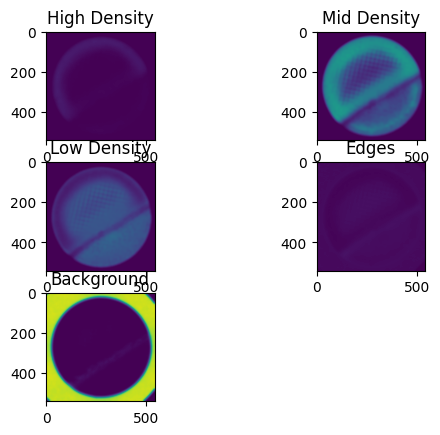

In [17]:
fig, axs = plt.subplots(3,2)
axs[0,0].imshow(highDensity_avg[:,:,300], vmin=0, vmax=213)
axs[0,0].set_title("High Density")
axs[0,1].imshow(midDensity_avg[:,:,300], vmin=0, vmax=213)
axs[0,1].set_title("Mid Density")
axs[1,0].imshow(lowDensity_avg[:,:,300], vmin=0, vmax=213)
axs[1,0].set_title("Low Density")
axs[1,1].imshow(edgeDensity_avg[:,:,300], vmin=0, vmax=213)
axs[1,1].set_title("Edges")
axs[2,0].imshow(bgDensity_avg[:,:,300], vmin=0, vmax=213)
axs[2,0].set_title("Background")
axs[2,1].remove()

fig.show()

In [20]:
segments = np.zeros((542,542,894), dtype=np.uint8)
for i in range(542):
    for j in range(542):
        for k in range(894):
            segments[i,j,k] = np.argmax([highDensity_avg[i,j,k],
                                      midDensity_avg[i,j,k],
                                      lowDensity_avg[i,j,k],
                                      edgeDensity_avg[i,j,k],
                                      bgDensity_avg[i,j,k]])

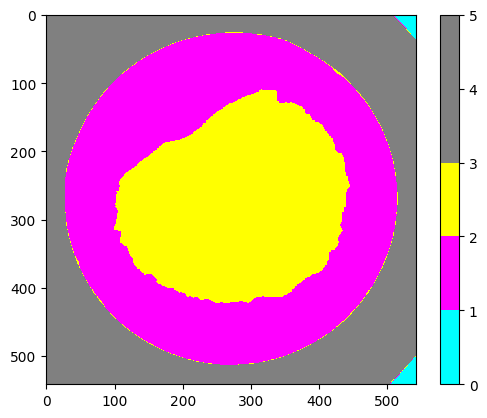

In [26]:
#test = (plc<=4)*plc
cmap, norm = mco.from_levels_and_colors([0,1,2,3,4,5], ['cyan','magenta','yellow','gray','gray'])
plt.imshow(segments[:,:,200], cmap=cmap, norm=norm)
plt.colorbar()
plt.show()